In [378]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from IPython.display import display

sns.set()
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [387]:
data = pd.read_csv("D:\\UPG\\CaseStudy\\LendingClub\\loan\\loan.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [393]:
## Check the columns for thier null values
## Its found that the below list of columns have completely null values

filt = data.isnull().sum() == len(data)
data_null_col = data.loc[:,filt]
data_null_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 54 columns):
mths_since_last_major_derog       0 non-null float64
annual_inc_joint                  0 non-null float64
dti_joint                         0 non-null float64
verification_status_joint         0 non-null float64
tot_coll_amt                      0 non-null float64
tot_cur_bal                       0 non-null float64
open_acc_6m                       0 non-null float64
open_il_6m                        0 non-null float64
open_il_12m                       0 non-null float64
open_il_24m                       0 non-null float64
mths_since_rcnt_il                0 non-null float64
total_bal_il                      0 non-null float64
il_util                           0 non-null float64
open_rv_12m                       0 non-null float64
open_rv_24m                       0 non-null float64
max_bal_bc                        0 non-null float64
all_util                          0 non-nul

In [396]:
filt = data.isnull().sum() != len(data)
data = data.loc[:,filt]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
id                            39717 non-null int64
member_id                     39717 non-null int64
loan_amnt                     39717 non-null int64
funded_amnt                   39717 non-null int64
funded_amnt_inv               39717 non-null float64
term                          39717 non-null object
int_rate                      39717 non-null object
installment                   39717 non-null float64
grade                         39717 non-null object
sub_grade                     39717 non-null object
emp_title                     37259 non-null object
emp_length                    39717 non-null object
home_ownership                39717 non-null object
annual_inc                    39717 non-null float64
verification_status           39717 non-null object
issue_d                       39717 non-null object
loan_status                   39717 non-null object
pymnt_pl

In [382]:
##Lets calculate the % of NULL values present in the remaining columns
round(data.isnull().sum()/len(data),2)*100

id                             0.0
member_id                      0.0
loan_amnt                      0.0
funded_amnt                    0.0
funded_amnt_inv                0.0
term                           0.0
int_rate                       0.0
installment                    0.0
grade                          0.0
sub_grade                      0.0
emp_title                      6.0
emp_length                     0.0
home_ownership                 0.0
annual_inc                     0.0
verification_status            0.0
issue_d                        0.0
loan_status                    0.0
pymnt_plan                     0.0
url                            0.0
desc                          33.0
purpose                        0.0
title                          0.0
zip_code                       0.0
addr_state                     0.0
dti                            0.0
delinq_2yrs                    0.0
earliest_cr_line               0.0
inq_last_6mths                 0.0
mths_since_last_deli

In [400]:
## As we can see in the above output "mths_since_last_record" and "next_pymnt_d" has more than 90% of null values.
## For "mths_since_last_delinq", we find that close to 67% of the data is either missing or value is 0. It might not be right stratergy to impute the mean or the median value for this as that will add the delinquit factor for candidates who might not have delinquited.
## Analyzed the dependency of "mths_since_last_delinq" with features like "chargeoff_within_12_mths","delinq_2yrs","pub_rec","open_acc" which has flavour of delinquicy, but there is no scope for value imputation.
## It is not feasible to perform any data missing data imputation on the  above 3 columns. 
## Also, the variables cannot be derived from any other variables.
## Hence removing these 3 columns
 
#data[["next_pymnt_d","loan_status"]][-data["next_pymnt_d"].isnull() & data["next_pymnt_d"]>0.0]
data = data.loc[:,~data.columns.isin(["next_pymnt_d","mths_since_last_record","mths_since_last_delinq"])]
data.info()


id                            False
member_id                     False
loan_amnt                     False
funded_amnt                   False
funded_amnt_inv               False
term                          False
int_rate                      False
installment                   False
grade                         False
sub_grade                     False
emp_title                      True
emp_length                    False
home_ownership                False
annual_inc                    False
verification_status           False
issue_d                       False
loan_status                   False
pymnt_plan                    False
url                           False
desc                           True
purpose                       False
title                          True
zip_code                      False
addr_state                    False
dti                           False
delinq_2yrs                   False
earliest_cr_line              False
inq_last_6mths              

In [401]:
## For "desc" column, i see that there is close to 33% of the data which is have NULL value. 
## Since desc column can yield some useful info about the loan availed by the user, i would not prefer to delete the column
## Instead, we would impute the NULL values with the standard message "No Description"
#data["desc"].isnull().sum()/len(data)
#data["desc"]#[data["mths_since_last_delinq"]>0].describe()
data["desc"][data["desc"].isnull()] = "No Description"
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 54 columns):
id                            39717 non-null int64
member_id                     39717 non-null int64
loan_amnt                     39717 non-null int64
funded_amnt                   39717 non-null int64
funded_amnt_inv               39717 non-null float64
term                          39717 non-null object
int_rate                      39717 non-null object
installment                   39717 non-null float64
grade                         39717 non-null object
sub_grade                     39717 non-null object
emp_title                     37259 non-null object
emp_length                    39717 non-null object
home_ownership                39717 non-null object
annual_inc                    39717 non-null float64
verification_status           39717 non-null object
issue_d                       39717 non-null object
loan_status                   39717 non-null object
pymnt_pl

In [406]:
## There are 28821 unique titles available under this column. 
## Since there are too many number of unique categories,it wont make much of a significance to retain this column as it might not have statistical significance on the loan status.
## Hence removing this column

## For "pub_rec_bankruptcies", there are only 3 unique values: 0, 1, 2. 
## Since the missing values constitutes around 2% of the data, deleting the NaN reords will lead to loosing significant chunk of data.
## As per my observation, the data is completle skewed towards the value 0.0 - close to 94% of the data
## Hence we can replace the NaN values with the value 0

#data = data.loc[:,~data.columns.isin(["emp_title"])]
data["pub_rec_bankruptcies"][data["pub_rec_bankruptcies"].isnull()] = 0
data["pub_rec_bankruptcies"].value_counts()


0.0    38036
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [408]:
## The remaining columns which have null values are "title","revol_util","last_pymnt_d","collections_12_mths_ex_med","chargeoff_within_12_mths","tax_liens",
## The individual count of the missing values for these columns are very negligible as campared to the actual population
## Also, if we remove the row in which either of these values are missing, then a total of 183 rows would be deleted, which is very negligible.
## Hence we will delete the records in which either of the above columns has Missing values

#len(data[data["title"].isnull() | data["last_pymnt_d"].isnull() | data["tax_liens"].isnull() | data["revol_util"].isnull() | data["collections_12_mths_ex_med"].isnull() | data["chargeoff_within_12_mths"].isnull()])
data = data[-(data["title"].isnull() | data["last_pymnt_d"].isnull() | data["tax_liens"].isnull() | data["revol_util"].isnull() | data["collections_12_mths_ex_med"].isnull() | data["chargeoff_within_12_mths"].isnull())]

## After processing the data for missing values, we have arrived at the below data set which has 39534 rows as compared to original 39717 rows and 53 columns as compared to 111 columns
# data.info()

In [ ]:
# temp = data.pivot_table( index='pub_rec',
#                      columns='loan_status', aggfunc='count')
# table = temp['id']

# table["Charged off to Fully Paid Ratio"] = table["Charged Off"]/table["Fully Paid"]
# table
#data ["pub_rec"].value_counts()
#plot=sns.distplot(data["delinq_2yrs"])

#plot.legend()
#plot.show()
#data.info()
#data.describe()

In [410]:


## from the below stats, we see that "collections_12_mths_ex_med", "policy_code", "acc_now_delinq", "chargeoff_within_12_mths", "delinq_amnt" and "tax_liens" have same value with no variation. 
## "delinq_2yrs", "pub_rec", "out_prncp", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "pub_rec_bankruptcies" have very high skewed data. As per m below analysis, one of the value holds close to 90% or more than that, which will not yield any useful insights
## Since they dont add any value to our analysis, we can remove these columns

data = data.loc[:,~data.columns.isin(["collections_12_mths_ex_med", "policy_code", "acc_now_delinq", "chargeoff_within_12_mths", "delinq_amnt", "tax_liens"])]
data[["delinq_2yrs","loan_status"]][data["delinq_2yrs"]>0]
lenth = len(data)
display(data["delinq_2yrs"].value_counts()[data["delinq_2yrs"].value_counts()>10])
display('Column delinq_2yrs has '+str(round((data["delinq_2yrs"].value_counts()[0]/lenth)*100,2))+"% of data with value "+ str(data["delinq_2yrs"].value_counts().keys()[0]))
display(data["pub_rec"].value_counts()[data["pub_rec"].value_counts()>10])
display('Column pub_rec has '+str(round((data["pub_rec"].value_counts()[0]/lenth)*100,2))+"% of data with value "+ str(data["pub_rec"].value_counts().keys()[0]))
display(data["out_prncp"].value_counts()[data["out_prncp"].value_counts()>10])
display('Column out_prncp has '+str(round((data["out_prncp"].value_counts()[0]/lenth)*100,2))+"% of data with value "+ str(data["out_prncp"].value_counts().keys()[0]))
display(data["total_rec_late_fee"].value_counts()[data["total_rec_late_fee"].value_counts()>100])
display('Column total_rec_late_fee has '+str(round((data["total_rec_late_fee"].value_counts()[0]/lenth)*100,2))+"% of data with value "+ str(data["total_rec_late_fee"].value_counts().keys()[0]))
display(data["recoveries"].value_counts()[data["recoveries"].value_counts()>10])
display('Column recoveries has '+str(round((data["recoveries"].value_counts()[0]/lenth)*100,2))+"% of data with value "+ str(data["recoveries"].value_counts().keys()[0]))
display(data["collection_recovery_fee"].value_counts()[data["collection_recovery_fee"].value_counts()>10])
display('Column collection_recovery_fee has '+str(round((data["collection_recovery_fee"].value_counts()[0]/lenth)*100,2))+"% of data with value "+ str(data["collection_recovery_fee"].value_counts().keys()[0]))
display(data["pub_rec_bankruptcies"].value_counts()[data["pub_rec_bankruptcies"].value_counts()>10])
display('Column pub_rec_bankruptcies has '+str(round((data["pub_rec_bankruptcies"].value_counts()[0]/lenth)*100,2))+"% of data with value "+ str(data["pub_rec_bankruptcies"].value_counts().keys()[0]))

data[["delinq_2yrs", "pub_rec", "out_prncp", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "pub_rec_bankruptcies"]].describe()



0    35246
1     3287
2      683
3      218
4       60
5       22
Name: delinq_2yrs, dtype: int64

'Column delinq_2yrs has 89.15% of data with value 0'

0    37430
1     2044
2       51
Name: pub_rec, dtype: int64

'Column pub_rec has 94.68% of data with value 0'

0.0    38394
Name: out_prncp, dtype: int64

'Column out_prncp has 97.12% of data with value 0.0'

0.0     37498
15.0      253
Name: total_rec_late_fee, dtype: int64

'Column total_rec_late_fee has 94.85% of data with value 0.0'

0.0    35385
Name: recoveries, dtype: int64

'Column recoveries has 89.51% of data with value 0.0'

0.0    35819
2.0       11
Name: collection_recovery_fee, dtype: int64

'Column collection_recovery_fee has 90.6% of data with value 0.0'

0.0    37862
1.0     1665
Name: pub_rec_bankruptcies, dtype: int64

'Column pub_rec_bankruptcies has 95.77% of data with value 0.0'

,delinq_2yrs,pub_rec,out_prncp,total_rec_late_fee,recoveries,collection_recovery_fee,pub_rec_bankruptcies
count,39534.000000,39534.000000,39534.000000,39534.00000,39534.000000,39534.000000,39534.000000
mean,0.146229,0.055016,51.465017,1.36609,94.442891,12.312812,0.042470
std,0.491026,0.237150,376.023954,7.30343,686.423417,148.522572,0.202537
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
max,11.000000,4.000000,6311.470000,180.20000,29623.350000,7002.190000,2.000000


In [158]:
# df = pd.DataFrame({'Group':['A','A','A','B','C','B','B','C','A','C'],\
#                   'Apple':np.random.rand(10),'Orange':np.random.rand(10)})
# df = df[['Group','Apple','Orange']]
# df

,Group,Apple,Orange
0,A,0.864010,0.871199
1,A,0.333248,0.536486
2,A,0.628054,0.254975
3,B,0.880309,0.184327
4,C,0.488766,0.945028
5,B,0.497421,0.045011
6,B,0.578663,0.410785
7,C,0.662771,0.813017
8,A,0.068993,0.646814
9,C,0.328557,0.307542


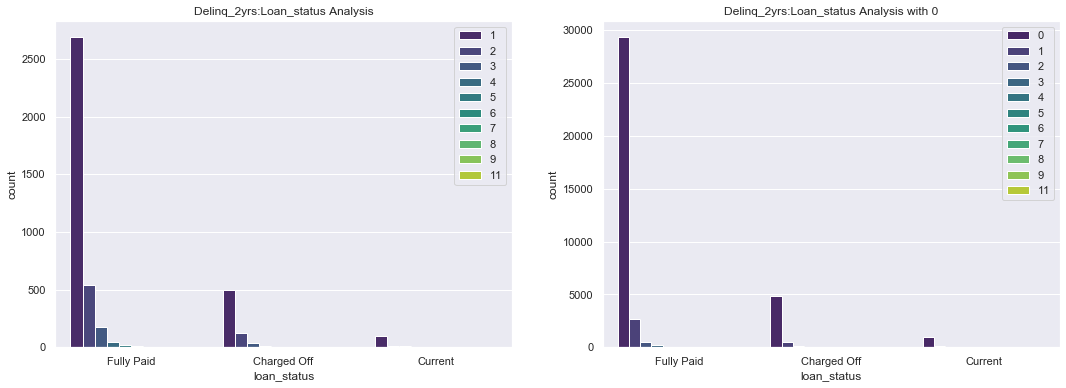

In [411]:
## Data Visualtization of the categorical biavariate: "delinq_2yrs:loan_status", "pub_rec:loan_status", "pub_rec_bankruptcies:loan_status"
## Lets take an example of "delinq_2yrs:loan_status"

tmp = data[['delinq_2yrs','loan_status']]
tmp_w0 = data[['delinq_2yrs','loan_status']][data['delinq_2yrs'] != 0]
#table  = pd.melt(table,id_vars=['pub_rec'],value_vars=['Charged Off','Current','Fully Paid'],var_name='loan_status')
#sns.boxplot(data=tmp,x='loan_status',y='pub_rec')

fig, axis = plt.subplots(1,2,figsize=(18, 6))

sns.catplot(x="loan_status", hue="delinq_2yrs",kind="count", palette="viridis", data=tmp_w0, ax=axis[0])
axis[0].set(title= "Delinq_2yrs:Loan_status Analysis")
axis[0].legend(loc='upper right')
plt.close() ## Note the use of plt.close()

sns.catplot(x="loan_status", hue="delinq_2yrs",kind="count", palette="viridis", data=tmp, ax=axis[1])
axis[1].set(title= "Delinq_2yrs:Loan_status Analysis with 0")
axis[1].legend(loc='upper right')
plt.close()



[Text(0.5, 1.0, 'Total_rec_late_fee:Loan_status Analysis')]

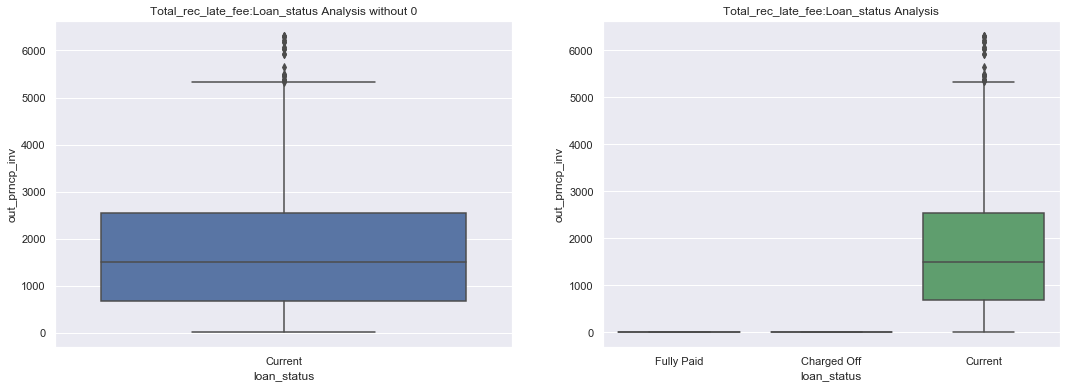

In [412]:
## Data Visualtization of the Continuous biavariate: "out_prncp:loan_status", "total_rec_late_fee:loan_status", "recoveries:loan_status", "collection_recovery_fee:loan_status"
## Lets take an example of "delinq_2yrs:loan_status"

tmp = data[['out_prncp_inv','loan_status']]
tmp_w0 = data[['out_prncp_inv','loan_status']][data['out_prncp_inv'] != 0]

fig, axis = plt.subplots(1,2,figsize=(18, 6))

sns.boxplot(x='loan_status',y='out_prncp_inv',data=tmp_w0,ax=axis[0])
axis[0].set(title= "Total_rec_late_fee:Loan_status Analysis without 0")

sns.boxplot(x='loan_status',y='out_prncp_inv',data=tmp,ax=axis[1])
axis[1].set(title= "Total_rec_late_fee:Loan_status Analysis")

#tmp_w0["loan_status"].value_counts()

In [413]:

#"delinq_2yrs", "pub_rec", , "total_rec_late_fee", "recoveries", "collection_recovery_fee", "pub_rec_bankruptcies"
#"out_prncp_inv","out_prncp" are only for current status
data = data.loc[:,~data.columns.isin(["delinq_2yrs", "pub_rec", "out_prncp_inv","out_prncp", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "pub_rec_bankruptcies"])]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39534 entries, 0 to 39665
Data columns (total 39 columns):
id                     39534 non-null int64
member_id              39534 non-null int64
loan_amnt              39534 non-null int64
funded_amnt            39534 non-null int64
funded_amnt_inv        39534 non-null float64
term                   39534 non-null object
int_rate               39534 non-null object
installment            39534 non-null float64
grade                  39534 non-null object
sub_grade              39534 non-null object
emp_length             39534 non-null object
home_ownership         39534 non-null object
annual_inc             39534 non-null float64
verification_status    39534 non-null object
issue_d                39534 non-null object
loan_status            39534 non-null object
pymnt_plan             39534 non-null object
url                    39534 non-null object
desc                   39534 non-null object
purpose                39534 non-null

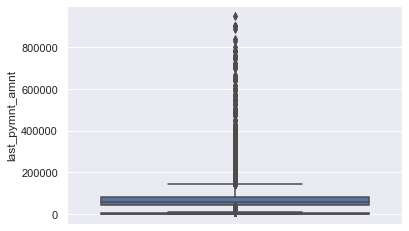

In [416]:
#data.describe() #39534
sns.boxplot(y = data['annual_inc'])
data = data[-(data['annual_inc']>1000000)]
len(data)

sns.boxplot(y = data['last_pymnt_amnt'])
data["loan_status"][data['total_rec_int']>15000].value_counts()
data = data[-(data['inq_last_6mths']>1000000)]
#len(data)

In [325]:
#data.loc[:,data.columns.isin(data.columns.dtype=='O')]
object_cols = data.select_dtypes(include=[np.object])
object_cols.head()

,grade,sub_grade,home_ownership,verification_status,loan_status,pymnt_plan,purpose,addr_state,initial_list_status,application_type
0,B,B2,RENT,Verified,Fully Paid,n,credit_card,AZ,f,INDIVIDUAL
1,C,C4,RENT,Source Verified,Charged Off,n,car,GA,f,INDIVIDUAL
2,C,C5,RENT,Not Verified,Fully Paid,n,small_business,IL,f,INDIVIDUAL
3,C,C1,RENT,Source Verified,Fully Paid,n,other,CA,f,INDIVIDUAL
4,B,B5,RENT,Source Verified,Current,n,other,OR,f,INDIVIDUAL


In [418]:
## Convert the date columns to Datetype: issue_d, earliest_cr_line, last_pymnt_d, last_credit_pull_d
## Convert "term", "int_rate", "emp_length","revol_util" to type Int/Float
## Remove url, decription, title and zip code 

data["issue_d"] = pd.to_datetime(data["issue_d"],format="%b-%y")
data["earliest_cr_line"] = pd.to_datetime(data["earliest_cr_line"],format="%b-%y")
data["last_pymnt_d"] = pd.to_datetime(data["last_pymnt_d"],format="%b-%y")
data["last_credit_pull_d"] = pd.to_datetime(data["last_credit_pull_d"],format="%b-%y")

data["term"] = data["term"].apply(lambda x: int(x.split()[0]))
data["int_rate"]  = data["int_rate"].apply(lambda x: float(x.split("%")[0]))
data["revol_util"] = data["revol_util"].apply(lambda x: float(x.split("%")[0]))

# Convert 10+ years to 10, "< 1 year" to 0.5 and "n/a" to 0 for representation purpose
def emp_length_value_convert(x):
    if x == "10+ years":
        return float(10)
    elif x == "< 1 year":
        return 0.5
    elif x == "n/a":
        return float(0)
    else:
        return float(x.split()[0])
data["emp_length"] = data["emp_length"].apply(lambda x: emp_length_value_convert(x))

data = data.loc[:,~data.columns.isin(["url", "desc", "title","zip_code"])]

#data["loan_status"][data["emp_length"]=="n/a"].value_counts()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,initial_list_status,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,application_type
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,10.0,RENT,24000.0,Verified,2011-12-01,Fully Paid,n,credit_card,AZ,27.65,1985-01-01,1,3,13648,83.7,9,f,5863.155187,5833.84,5000.00,863.16,2015-01-01,171.62,2016-05-01,INDIVIDUAL
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,0.5,RENT,30000.0,Source Verified,2011-12-01,Charged Off,n,car,GA,1.00,1999-04-01,5,3,1687,9.4,4,f,1008.710000,1008.71,456.46,435.17,2013-04-01,119.66,2013-09-01,INDIVIDUAL
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,10.0,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,n,small_business,IL,8.72,2001-11-01,2,2,2956,98.5,10,f,3005.666844,3005.67,2400.00,605.67,2014-06-01,649.91,2016-05-01,INDIVIDUAL
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,10.0,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,n,other,CA,20.00,1996-02-01,1,10,5598,21.0,37,f,12231.890000,12231.89,10000.00,2214.92,2015-01-01,357.48,2016-04-01,INDIVIDUAL
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,1.0,RENT,80000.0,Source Verified,2011-12-01,Current,n,other,OR,17.94,1996-01-01,0,15,27783,53.9,38,f,3513.330000,3513.33,2475.94,1037.39,2016-05-01,67.79,2016-05-01,INDIVIDUAL


In [422]:
#data_new = data
data.info()
# object_cols = data_new.select_dtypes(include=[np.object])
# object_cols.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39520 entries, 0 to 39665
Data columns (total 35 columns):
id                     39520 non-null int64
member_id              39520 non-null int64
loan_amnt              39520 non-null int64
funded_amnt            39520 non-null int64
funded_amnt_inv        39520 non-null float64
term                   39520 non-null int64
int_rate               39520 non-null float64
installment            39520 non-null float64
grade                  39520 non-null int64
sub_grade              39520 non-null int64
emp_length             39520 non-null float64
home_ownership         39520 non-null object
annual_inc             39520 non-null float64
verification_status    39520 non-null object
issue_d                39520 non-null datetime64[ns]
loan_status            39520 non-null object
pymnt_plan             39520 non-null object
purpose                39520 non-null object
addr_state             39520 non-null object
dti                    39520 n

In [424]:
# sorted(object_cols["sub_grade"].value_counts().keys())
# object_cols["home_ownership"].value_counts()
# object_cols["verification_status"].value_counts()
# object_cols["pymnt_plan"].value_counts()
# object_cols["addr_state"].value_counts()
# object_cols["initial_list_status"].value_counts()
# object_cols["application_type"].value_counts()

## We can convert the grade and the sub-grade field into ordered categorical field with grade 'A' being assigned the value 1
grade_list = sorted(object_cols["grade"].value_counts().keys())
grade_dict = {n:i+1 for i,n in enumerate(grade_list)}
sub_grade_list = sorted(object_cols["sub_grade"].value_counts().keys())
sub_grade_dict = {n:i+1 for i,n in enumerate(sub_grade_list)}
data_new["grade"] = data_new["grade"].apply(lambda x: grade_dict[x])
data_new["sub_grade"] = data_new["sub_grade"].apply(lambda x: sub_grade_dict[x])

## For "home_ownership" column, we will remove "OTHER" and "NONE" value
data_new = data_new[-((data["home_ownership"] == "OTHER") | (data["home_ownership"] == "NONE"))]

## Remove "pymnt_plan" column as all the values in that column is "n"
## Remove "initial_list_status" and "application_type" column as all the values in those columns are "f" & "INDIVIDUAL" respectively
data_new = data_new.loc[:,~data_new.columns.isin(["pymnt_plan", "initial_list_status", "application_type"])]

## Remove values for "addr_state" column where the count is less than 80
addr_state_list = data_new["addr_state"].value_counts().keys()[data_new["addr_state"].value_counts() > 80]
data_new = data_new[data_new["addr_state"].isin(addr_state_list)]


## id and member_id columns can be removed as they are not relevent for the analysis
data_new = data_new.loc[:,~data_new.columns.isin(["id", "member_id"])]
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39171 entries, 0 to 39665
Data columns (total 30 columns):
loan_amnt              39171 non-null int64
funded_amnt            39171 non-null int64
funded_amnt_inv        39171 non-null float64
term                   39171 non-null int64
int_rate               39171 non-null float64
installment            39171 non-null float64
grade                  39171 non-null int64
sub_grade              39171 non-null int64
emp_length             39171 non-null float64
home_ownership         39171 non-null object
annual_inc             39171 non-null float64
verification_status    39171 non-null object
issue_d                39171 non-null datetime64[ns]
loan_status            39171 non-null object
purpose                39171 non-null object
addr_state             39171 non-null object
dti                    39171 non-null float64
earliest_cr_line       39171 non-null datetime64[ns]
inq_last_6mths         39171 non-null int64
open_acc            

In [425]:
data_new.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d
0,5000,5000,4975.0,36,10.65,162.87,2,7,10.0,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,1985-01-01,1,3,13648,83.7,9,5863.155187,5833.84,5000.00,863.16,2015-01-01,171.62,2016-05-01
1,2500,2500,2500.0,60,15.27,59.83,3,14,0.5,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,GA,1.00,1999-04-01,5,3,1687,9.4,4,1008.710000,1008.71,456.46,435.17,2013-04-01,119.66,2013-09-01
2,2400,2400,2400.0,36,15.96,84.33,3,15,10.0,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,2001-11-01,2,2,2956,98.5,10,3005.666844,3005.67,2400.00,605.67,2014-06-01,649.91,2016-05-01
3,10000,10000,10000.0,36,13.49,339.31,3,11,10.0,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,1996-02-01,1,10,5598,21.0,37,12231.890000,12231.89,10000.00,2214.92,2015-01-01,357.48,2016-04-01
4,3000,3000,3000.0,60,12.69,67.79,2,10,1.0,RENT,80000.0,Source Verified,2011-12-01,Current,other,OR,17.94,1996-01-01,0,15,27783,53.9,38,3513.330000,3513.33,2475.94,1037.39,2016-05-01,67.79,2016-05-01


count    39171.000000
mean      2692.942910
std       4457.516115
min          0.010000
25%        221.055000
50%        552.110000
75%       3317.080000
max      36115.200000
Name: last_pymnt_amnt, dtype: float64

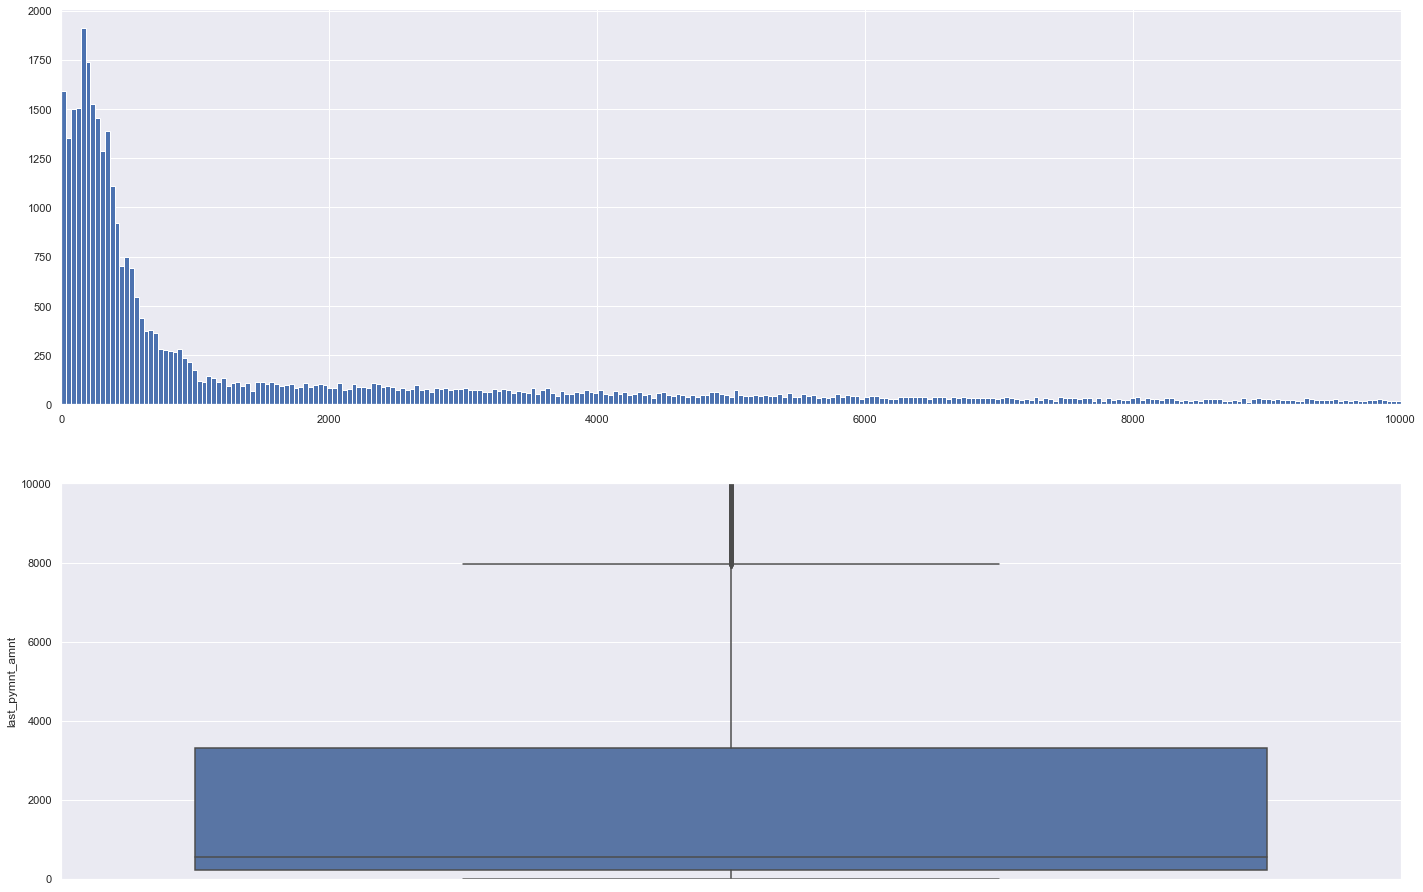

In [494]:
## Univariate Continuous variable analysis

## loan_amnt: The values are more concentrated around the multiples of 5000. Also, we can see prominent spikes around multiple of 1000. While 50% of the values are concentrated between 5k and 15k mark, 99.5% of the values are between 100 and 30k
## funded_amnt: The values are more concentrated around the multiples of 5000. Also, we can see prominent spikes around multiple of 1000. While 50% of the values are concentrated between 5k and 15k mark, 99.5% of the values are between 100 and 30k
## funded_amnt_inv: Follows same pattern as loan_amnt and funded_amnt. Compared to loan_amnt and funded_amnt, the values are slightly spready and not concentrated around multiples of 5k or 1k mark
## int_rate: 50% of the values are between 9% and 14%. A good number of values are centered around 7.5% (Close to 12% of values)
## installment: 50% of the values are between 180 and 420 and 99% of valuea are between 50 and 820. From 200, the number of borowers owing the installments decreases as the instalments increases
## annual_inc: 50% of the borrowers have annual income between 40k and 83k. 75% of them have less than 83k. Median value is around 60k
## dti: 50% of borrowers have dti between 8.2 and 18.6 with median value of 13.4. 75% of the user have less than 18.6. For dti between 5 and 25 the number of user is almost evenly spread out 
## revol_bal: revol_bal has an interesting smooth pattern. As revol balance increases, the number of users decrease.Has a median value of 8.8k with 75% of borrowers less than 17k.
## revol_util: revol_util has flat pattern. The number of user remains fairly constant as the value of "revol_util" increases. Median value is 50.
## total_pymnt: Has a median value of 10k with 50% of borrowers concentrated between 5.6k and 16.5k. Has the same pattern as loan_amnt
## total_pymnt_inv: Has a median value of 9.3k with 50% of borrowers concentrated between 5.1k and 15.8k. Has the same pattern as loan_amnt and total_pymnt
## total_rec_prncp: The number of borrowers are more concentrated around round figures. Interesting to match this parameter with the "funded_amnt" as the difference might highlight the defaulters.  Has a median value of 8k with 50% of borrowers concentrated between 4.6k and 13.7k
## total_rec_int: total_rec_int has an interesting smooth pattern. Seems like the lesser borrowers pay more interest and the number of users decreases as the interest increases. 
## last_pymnt_amnt: The number of users decreases as the last_amount decreases i.e there are lesser users who have paid more amount as their last installment.






#data_new["issue_d"].value_counts()

fig, axis = plt.subplots(2,1,figsize=(24, 16))
axis[0].hist(data_new["last_pymnt_amnt"],bins=1000)
#sns.distplot(data_new["int_rate"],bins=38,ax=axis[0])
sns.boxplot(y="last_pymnt_amnt",data=data_new,ax=axis[1])
axis[1].set(ylim=(0,10000))
axis[0].set(xlim=(0,10000))

data_new["last_pymnt_amnt"].describe()
# #!pip install -U seaborn

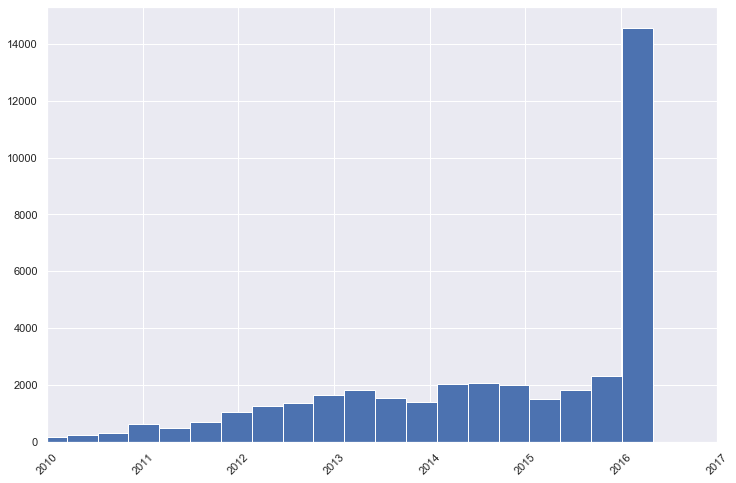

In [614]:
## Univariate categorical variable analysis

## grade: Most of the user have grade B, followed by A. The number of users decreases as grade is degraded i.e from C to F, the number of users reduces
## sub_grade: Has interesting pattern: For grade A and B, the number of borrowers increase with decrease in sub-grade i.e from A1 to A5 and B1 to B5. This might be because the borrowers tend to maintain a higer grade (even though lower sub-grade) than a lower grade. But for C, D, E and F, there are more borrowers towards the higer spectrum of the grade (C1,C2) compared to lower end(C4, C5)
## emp_length: What we observe in this trend is that the more the experience, lesser the number of users who tend to borrow. But one interesting observation is people who are less than 1 year experience tend to borrow high compared to 1-2 years. This might be because the sense of getting a job, compels many users to apply for loan, and since many would have applied for load in the initial year of getting a job, they tend to refrain for the next year i.e between 1 to 2 years. Also 10+ years experience people have higher borrowers. Though the experience is spread over a larger spectrum of experience (10+ years) it would be interesting to analyze the reason for borrowing and their default rate
## home_ownership: Most of the brrowers are either on rent or already have a mortgage. This shows that people who tend to borrow have some or the other prior obligations
## verification_status: Good number of borrowers income was verified: either the income or the source of income.But around 40% of theirs is no verified. Would be interesting to see their loan status
## issue_d: Between March 2008 till Oct 2008, the issuence of loans decreased. This is due to the 2008 financial crisis. But start of 2009, there was an increase in disbursment of loan. It would be interesting to analyze, which period of load disbursment led to the highest default.
## loan_status: Amjority of the users have fully paid the loans. Whereas close of 15% of them have defaulted or have been charged off
## purpose: Most of the users have borrowed for debt_consolidation. Would be intresting for how many people have defaulted under this category. This is followed by credit_card, Others and Home improvement.
## addr_state: Most of the users are from Califirnia, followed by NewYork, Florida and Texas. Understandebly, these are one of the most populous state in US 
## earliest_cr_line***: There are more values between 1995 and 2005. Its interesting to note that more numbers of borrowers have their credit line opened during the month of Oct, Nov and Dec. This specially the time of Thanks Giving, Black Friday and Christmas (Holiday time in the US). There are some values beyond 2045. These look like data entry issue
## inq_last_6mths: Many borrowers have not inquired anything, and the number of users decreases as the number of enquiries increases.
## open_acc:Many users have between 5-10 open credit line. As the value of open_acc increases, the number of user decreases
## total_acc: Many user have between 10-20 accounts. As the "total_acc" value increases, the number of borrowers decreases.
## last_pymnt_d: Many users have their last payment date as May-2016. Bulk of them fall between 2012 and 2015
## last_credit_pull_d: Bulk of the user have their last_credit_pull_date between 2011 and mid 2016. Many of them have it on May-2016

#data["last_credit_pull_d"].describe()
data["last_credit_pull_d"].value_counts()
fig, axis = plt.subplots(1,1,figsize=(12, 8))
axis.hist(data_new["last_credit_pull_d"],bins=1050,log=False)
#axis.yscale('log')
plt.xticks(rotation="45")
axis.set(xlim=("2010-01-01","2017-01-01"))
plt.show()
# #sorted(data_new["earliest_cr_line"][data_new["earliest_cr_line"]>"2015"])


In [ ]:
#dd=pd.melt(df,id_vars=['Group'],value_vars=['Apple','Orange'],var_name='fruits')
#sns.boxplot(x='Group',y='value',data=dd,hue='fruits')


# temp = data.pivot_table( index='pub_rec',
#                      columns='loan_status', aggfunc='count')
# table = temp['id']